<a href="https://colab.research.google.com/github/NiEl0503/Exercicios-woman/blob/main/Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Desafio 1: Entendendo os estudantes.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Leia a base de dados e faça uma análise inicial, como por exemplo,
verificar o tamanho da base de dados (quantidade de linhas e
colunas) e o tipo das variáveis.


In [ ]:
students = pd.read_csv('/content/StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
students.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


2. Alguma variável precisa ser alterada ou criada? Faça as alterações se
julgar necessária.


In [ ]:
students = students.rename(columns={
    'race/ethnicity': 'ethnicity'})

students


,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


3. Verifique a quantidade de alunos em cada grupo racial/étnico.


In [ ]:
race_count = students['ethnicity'].value_counts()
race_count

,count
ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do
gênero masculino ou feminino?


In [ ]:
gender_count = students['gender'].value_counts()
gender_count

,count
gender,
female,518
male,482


**Há mais mulheres com um total de 518 alunos versus homens com um total de 482**

5. Analise as notas de matemática dos alunos de forma mais completa
possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que
pode ser aplicado para esse tipo de variável. Por exemplo, se for uma
variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma
variável qualitativa faça a tabela de fequência, moda, etc.


In [ ]:
# resumo estatístico
summary_stats = students['math score'].describe()
summary_stats

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [ ]:
# mediana
math_median = students['math score'].median()
math_median

66.0

In [ ]:
# mode
math_mode = students['math score'].mode()
math_mode

,math score
0,65


In [ ]:
# variancia
math_variance = students['math score'].var()
math_variance

229.91899799799796

Faça também análises gráficas das sugestões abaixo ou o que achar
pertinente.

● Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?


In [ ]:
mean_math_scores = students.groupby('parental level of education')['math score'].mean()
print(mean_math_scores)

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


<ipython-input-25-6702036be25a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=students, palette='Set3')


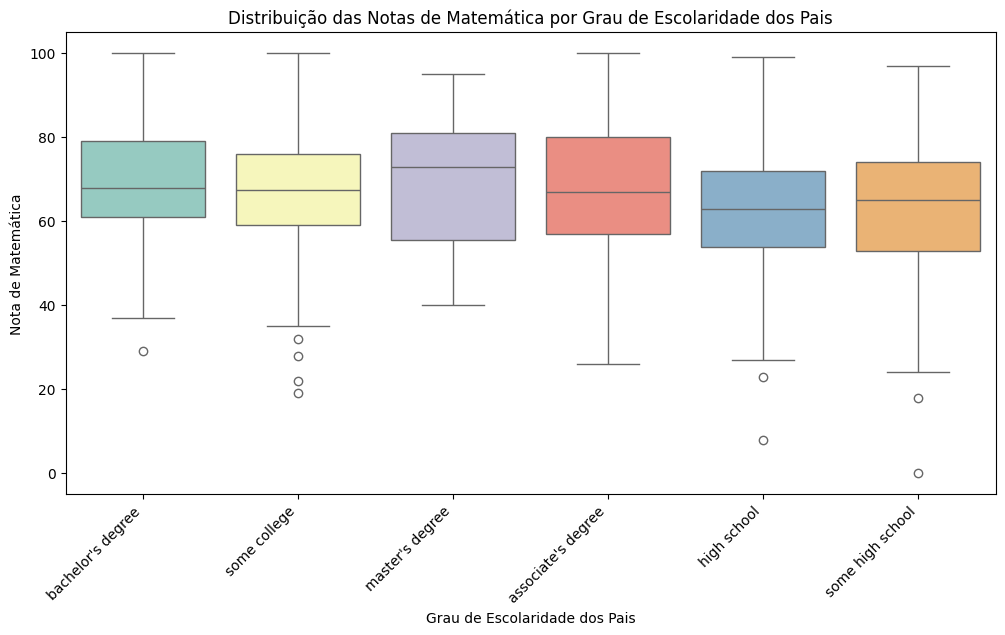

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=students, palette='Set3')
plt.title('Distribuição das Notas de Matemática por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Matemática')
plt.xticks(rotation=45, ha='right')
plt.show()

Faça a mesma análise para as notas de leitura e escrita.


In [ ]:
# a. Leitura
average_reading_score = students.groupby('parental level of education')['reading score'].mean()
print(average_reading_score)

parental level of education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading score, dtype: float64


<ipython-input-8-7340ec5b8961>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='reading score', data=students, palette='Set3')


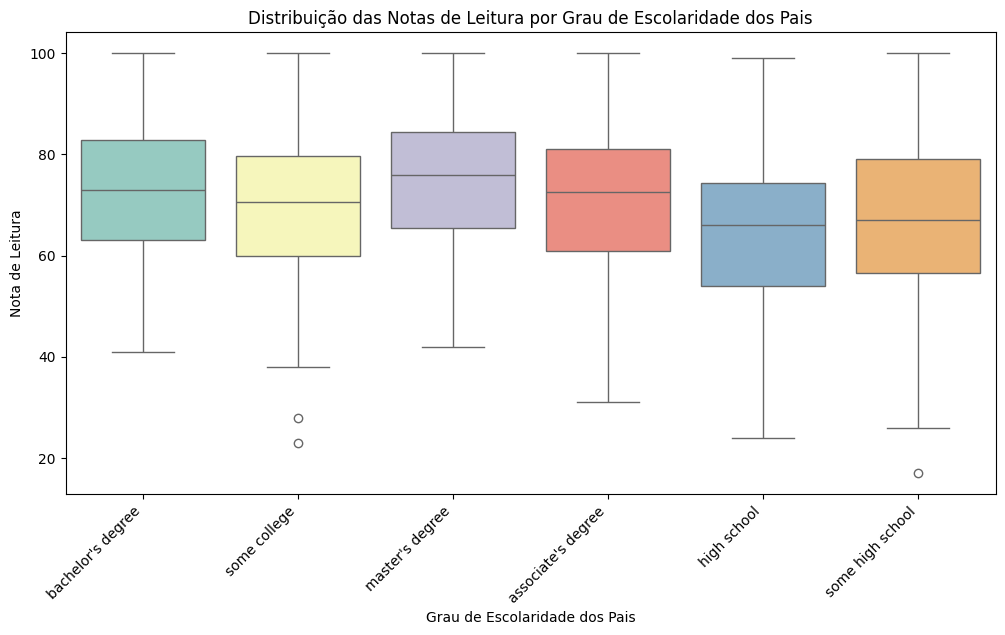

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='reading score', data=students, palette='Set3')
plt.title('Distribuição das Notas de Leitura por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Leitura')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# b. Escrita
average_writing_score = students.groupby('parental level of education')['writing score'].mean()
print(average_writing_score)

parental level of education
associate's degree    69.896396
bachelor's degree     73.381356
high school           62.448980
master's degree       75.677966
some college          68.840708
some high school      64.888268
Name: writing score, dtype: float64


<ipython-input-10-4aaae4e4ce8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='writing score', data=students, palette='Set3')


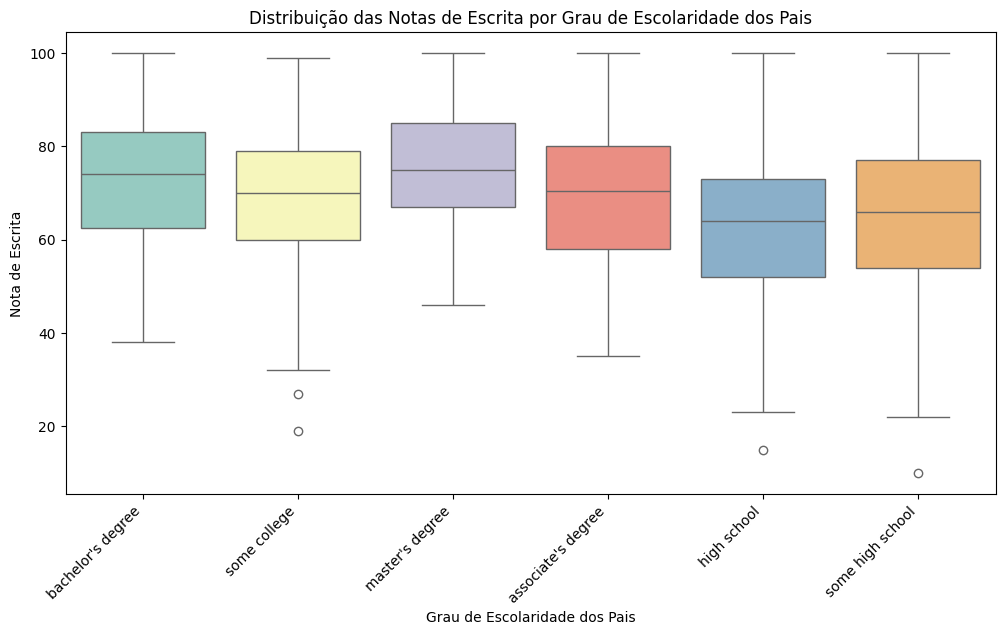

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='writing score', data=students, palette='Set3')
plt.title('Distribuição das Notas de Escrita por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Escrita')
plt.xticks(rotation=45, ha='right')
plt.show()

● Verifique gráficamente a relação da nota de leitura e de escrita.


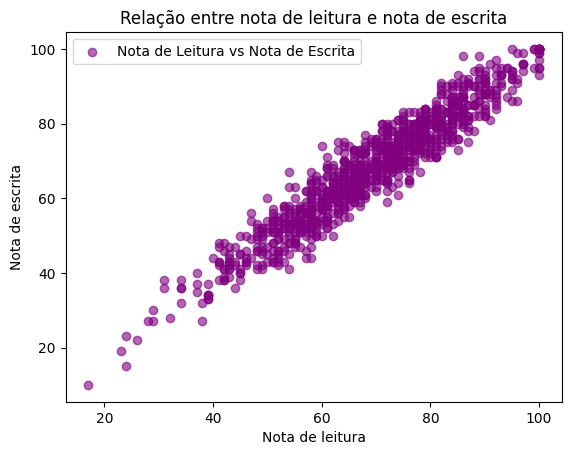

In [ ]:
# gráfico de dispersão
plt.scatter(students['reading score'], students['writing score'], label='Nota de Leitura vs Nota de Escrita', color='purple', alpha=0.6)

plt.title('Relação entre nota de leitura e nota de escrita')
plt.xlabel('Nota de leitura')
plt.ylabel('Nota de escrita')
plt.legend()

plt.show()


**Correlação Positiva Forte:**

Os pontos do gráfico seguem tendência ascendente, indicando que à medida que aumenta a nota de leitura, a nota de escrita também tende a aumentar.

**Distribuição de dados:**

A maior parte dos pontos está concentrada em uma faixa específica, sugerindo que os alunos apresentam pontuações semelhantes nas duas áreas.

**Linearidade:**

A relação parece ser bastante linear, o que significa que um aumento na nota de leitura está associado a um aumento proporcional na nota de escrita.

**Atividade extra:**

Análise mais algum dado que seja interessante avaliar e represente
graficamente, através de boxplot, histogramas, barplot dentre outros
diversos de livre escolha.

In [ ]:
# Media das notas de matemática por gênero
average_math_score_by_gender = students.groupby('gender')['math score'].mean()
average_math_score_by_gender

,math score
gender,
female,63.633205
male,68.728216


<ipython-input-7-97ad5db29424>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=students, palette='Set3')


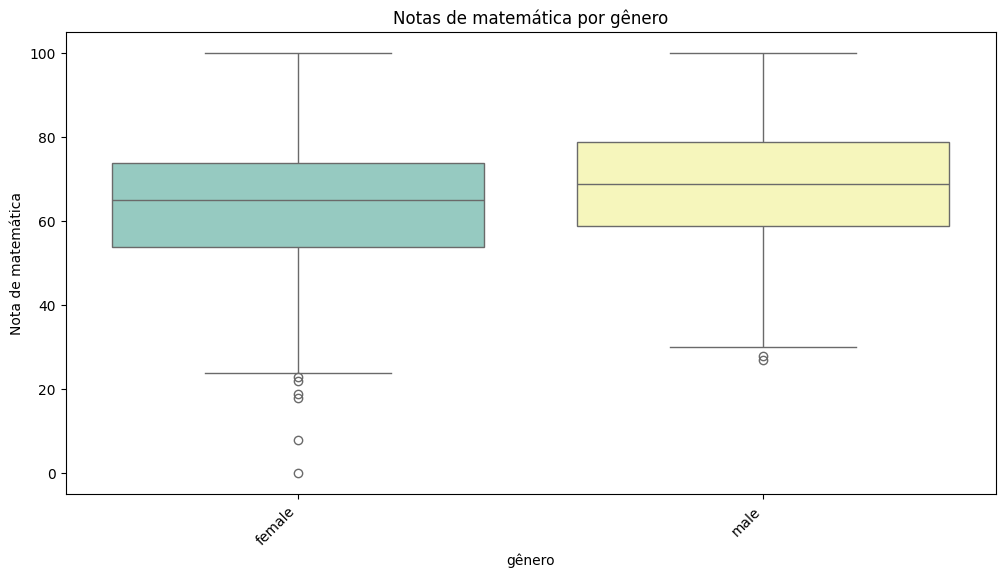

In [ ]:
# Gráfica de notas de matemática por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='math score', data=students, palette='Set3')
plt.title('Notas de matemática por gênero')
plt.xlabel('gênero')
plt.ylabel('Nota de matemática')
plt.xticks(rotation=45, ha='right')
plt.show()

**Medianas:** A mediana das notas de matemática para os estudantes homens (male) parece ser ligeiramente superior à das mulheres (female), o que indica que, em média, os homens obtiveram melhores notas em matemática.

**Distribuição:** A caixa para os homens parece estar um pouco mais alta em geral em comparação com a das mulheres, o que sugere que os homens têm uma distribuição de notas de matemática mais elevada.

**Outliers:** Há mais valores atípicos no grupo feminino do que no masculino, o que pode indicar que algumas mulheres têm notas de matemática consideravelmente mais baixas do que a maioria das outras mulheres.

In [ ]:
# Media das notas de leitura por gênero
average_reading_score_by_gender = students.groupby('gender')['reading score'].mean()
average_reading_score_by_gender

,reading score
gender,
female,72.608108
male,65.473029


<ipython-input-8-b979490eeb8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=students, palette='Set3')


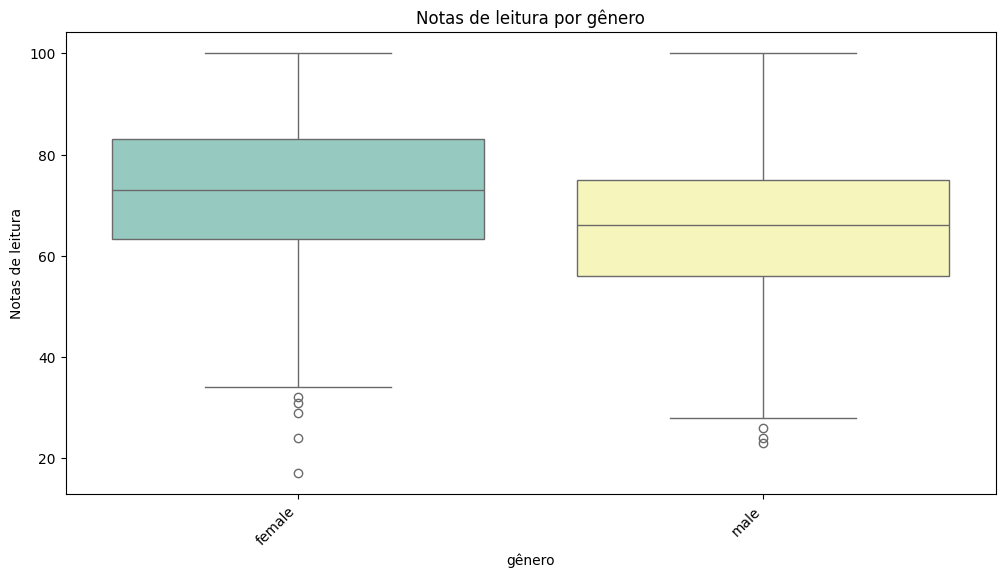

In [ ]:
# Gráfica de notas de leitura por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='reading score', data=students, palette='Set3')
plt.title('Notas de leitura por gênero')
plt.xlabel('gênero')
plt.ylabel('Notas de leitura')
plt.xticks(rotation=45, ha='right')
plt.show()

**Medianas:** A mediana das notas de leitura para as estudantes mulheres (female) parece ser ligeiramente superior à dos homens (male), o que indica que, em média, as mulheres obtiveram melhores notas em leitura.

**Distribuição:** A caixa para as mulheres parece estar um pouco mais alta em geral em comparação com a dos homens, o que sugere que as mulheres têm uma distribuição de notas de leitura mais elevada.

**Outliers:** Há mais valores atípicos no grupo feminino do que no masculino, o que pode indicar que algumas mulheres têm notas de leitura consideravelmente mais baixas do que a maioria das outras mulheres.

In [ ]:
# Media das notas de leitura por gênero
average_writing_score_by_gender = students.groupby('gender')['writing score'].mean()
average_writing_score_by_gender

,writing score
gender,
female,72.467181
male,63.311203


<ipython-input-9-5db4e3ba3fa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=students, palette='Set3')


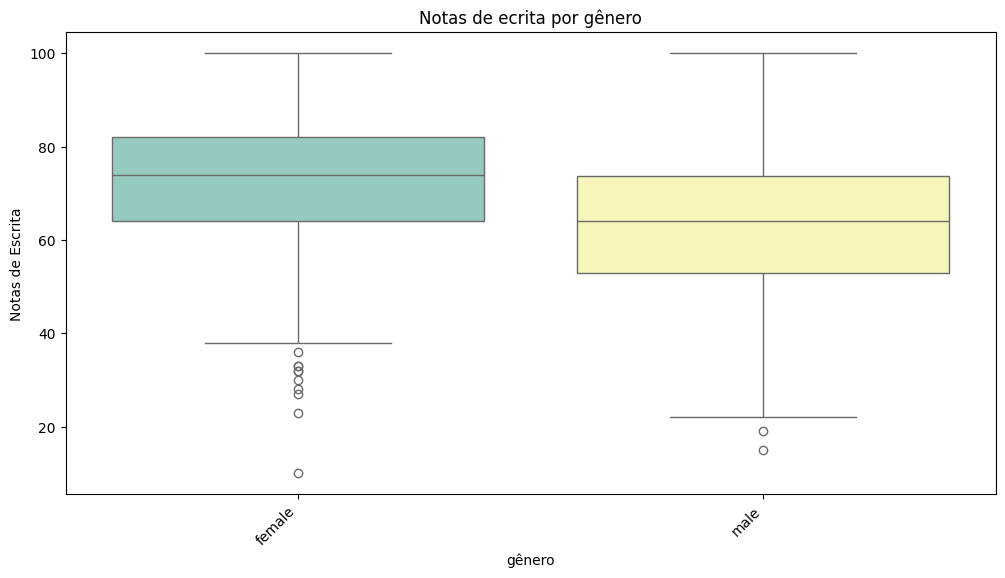

In [ ]:
# Gráfica de notas de escrita por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='writing score', data=students, palette='Set3')
plt.title('Notas de ecrita por gênero')
plt.xlabel('gênero')
plt.ylabel('Notas de Escrita')
plt.xticks(rotation=45, ha='right')
plt.show()

**Medianas:** A mediana das notas de escrita para as estudantes mulheres (female) parece ser ligeiramente superior à dos homens (male), o que indica que, em média, as mulheres obtiveram melhores notas em escrita.

**Distribuição:** A caixa para as mulheres parece estar um pouco mais alta em geral em comparação com a dos homens, o que sugere que as mulheres têm uma distribuição de notas de escrita mais elevada.

**Outliers:** Há mais valores atípicos no grupo feminino do que no masculino, o que pode indicar que algumas mulheres têm notas de escrita consideravelmente mais baixas do que a maioria das outras mulheres.